<a href="https://colab.research.google.com/github/mventparram/HotspotHero6/blob/main/Internet_access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#necessary for creating maps, check if installed if not, install in appropriate way either through conda, or pip like here
!pip install --user geopandas

     |████████████████████████████████| 972kB 4.7MB/s 
     |████████████████████████████████| 6.5MB 19.5MB/s 
     |████████████████████████████████| 14.8MB 307kB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#__credits__ = ["Daniel Hardesty Lewis"], learned to install this package from Daniel Hardesty Lewis's code
!pip install --user contextily

     |████████████████████████████████| 18.3MB 1.2MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#now we can import geopandas and necessary packages for mapping 
import geopandas as gpd

In [ ]:
#helps us locate our files, helps us create a path and interact with our operating system
import os

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

In [ ]:
#written in colab.research.google.com so we upload the zipfile to the colab (doesn't work locally like jupyter notebook)
os.getcwd()

'/content'

In [ ]:
"""
__author__ = "Daniel Hardesty Lewis"
__copyright__ = "Copyright 2020, Daniel Hardesty Lewis"
__credits__ = ["Daniel Hardesty Lewis"]
__license__ = "GPLv3"
__version__ = "1.0.0"
__maintainer__ = "Daniel Hardesty Lewis"
__email__ = "dhl@tacc.utexas.edu"
"""
def visualize(gdfs,edgecolors=False,facecolors=False,units=7.):

    f, ax = plt.subplots(figsize=(
        units,
        gdfs[0].shape[1]/gdfs[0].shape[0]*units
    ))
    if edgecolors==False:
        edgecolors = ['k']*len(gdfs)
    if facecolors==False:
        facecolors = ['r']*len(gdfs)
    for i, gdf in enumerate(gdfs):
        gdf.to_crs(epsg=3857).plot(
            ax=ax,
            figsize=(
                units,
                gdfs[0].shape[1]/gdfs[0].shape[0]*units
            ),
            alpha=.5,
            edgecolor=edgecolors[i],
            facecolor=facecolors[i]
        )
    ctx.add_basemap(ax)
    plt.show()

In [ ]:
#creating variable unservedmap and assigninging our dataset as a geopandas dataframe
unservedmap = gpd.read_file('https://broadband.georgia.gov/sites/default/files/documents/GBDI_Unserved_CB_Jun2020_SHP.zip')

In [ ]:
#printing our dataset
unservedmap

,CBID,CBYear,CountyFIPS,County,GeorgiaOne,RC,USCongress,GAHouse,GASenate,Served,Unserved,Status,UnservPCT,SHAPE_Leng,SHAPE_Area,geometry
0,130019501001082,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,0,14,Unserved,100,0.055681,1.667051e-04,"POLYGON ((-82.13259 31.83737, -82.13357 31.837..."
1,130019501002050,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,0,18,Unserved,100,0.122149,5.090901e-04,"POLYGON ((-82.37279 31.89540, -82.37271 31.895..."
2,130019501002088,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,15,23,Unserved,61,0.082005,3.024479e-04,"POLYGON ((-82.33178 31.86850, -82.33131 31.868..."
3,130019501001079,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,0,3,Unserved,100,0.032988,5.844054e-05,"POLYGON ((-82.20722 31.84821, -82.20723 31.849..."
4,130019501001058,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,0,17,Unserved,100,0.069873,2.919253e-04,"POLYGON ((-82.15611 31.87255, -82.15619 31.872..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291081,133219501001054,2010,321,Worth,1,Southwest Georgia,008,152,013,0,0,No Locations,None,0.176064,2.638515e-05,"POLYGON ((-83.99450 31.78669, -83.99440 31.786..."
291082,133219501001028,2010,321,Worth,1,Southwest Georgia,008,152,013,0,0,No Locations,None,0.002509,3.448480e-07,"POLYGON ((-83.92407 31.83703, -83.92411 31.836..."
291083,133219501002177,2010,321,Worth,1,Southwest Georgia,008,152,013,0,0,No Locations,None,0.051664,1.533145e-04,"POLYGON ((-83.80800 31.68675, -83.80800 31.686..."
291084,133219506001053,2010,321,Worth,1,Southwest Georgia,008,152,013,0,0,No Locations,None,0.008132,1.686459e-06,"POLYGON ((-83.97687 31.33473, -83.97686 31.334..."


In [ ]:
#Cleaned up our file by only containing data from the Atlanta Regional Commission
unservedmap = unservedmap.loc[unservedmap['RC'] == 'Atlanta Regional Commission']
unservedmap

,CBID,CBYear,CountyFIPS,County,GeorgiaOne,RC,USCongress,GAHouse,GASenate,Served,Unserved,Status,UnservPCT,SHAPE_Leng,SHAPE_Area,geometry
49909,130570901002065,2010,057,Cherokee,2,Atlanta Regional Commission,011,022,021,7,0,Served,<1,0.035168,1.225839e-05,"POLYGON ((-84.37781 34.36075, -84.37788 34.360..."
49910,130570901004126,2010,057,Cherokee,2,Atlanta Regional Commission,011,023,014,2,0,Served,<1,0.004934,1.382567e-06,"POLYGON ((-84.45850 34.29134, -84.45905 34.290..."
49911,130570901002076,2010,057,Cherokee,2,Atlanta Regional Commission,011,022,021,1,0,Served,<1,0.006803,1.666250e-06,"POLYGON ((-84.37589 34.36098, -84.37604 34.360..."
49912,130570910071011,2010,057,Cherokee,2,Atlanta Regional Commission,011,020,021,163,0,Served,<1,0.038916,5.658106e-05,"POLYGON ((-84.55815 34.15367, -84.55720 34.154..."
49913,130570910061000,2010,057,Cherokee,2,Atlanta Regional Commission,011,020,021,97,0,Served,<1,0.014180,8.100686e-06,"POLYGON ((-84.57564 34.12761, -84.57589 34.127..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240169,132470603052032,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,0,0,No Locations,None,0.007612,1.474408e-06,"POLYGON ((-83.97770 33.63532, -83.97806 33.634..."
240170,132470603053060,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,0,0,No Locations,None,0.000679,2.426300e-08,"POLYGON ((-84.00524 33.65366, -84.00538 33.653..."
240171,132470603053018,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,0,0,No Locations,None,0.003797,5.717635e-07,"POLYGON ((-83.97082 33.67018, -83.97083 33.670..."
240172,132470602021012,2010,247,Rockdale,0,Atlanta Regional Commission,004,091,043,0,0,No Locations,None,0.011267,4.527595e-06,"POLYGON ((-84.07830 33.68349, -84.07849 33.683..."


In [ ]:
#data carpentry, we are interested in focusing by county and seeing how many unique values each county has in each column
unservedmap.groupby('County').nunique().sort_values('CBID')

,CBID,CBYear,CountyFIPS,GeorgiaOne,RC,USCongress,GAHouse,GASenate,Served,Unserved,Status,UnservPCT,SHAPE_Leng,SHAPE_Area,geometry
County,,,,,,,,,,,,,,,
Rockdale,1518,1,1,1,1,2,6,2,159,16,3,24,1518,1518,1518
Douglas,1699,1,1,1,1,3,6,4,219,25,3,40,1699,1699,1699
Fayette,1705,1,1,1,1,2,6,4,184,19,3,41,1705,1705,1705
Henry,3017,1,1,1,1,4,8,3,249,26,3,45,3017,3017,3017
Cherokee,3455,1,1,1,1,1,6,3,278,39,3,55,3455,3455,3455
Clayton,3505,1,1,1,1,3,8,4,271,11,3,21,3505,3505,3505
Gwinnett,7502,1,1,1,1,4,20,9,481,23,3,40,7502,7502,7502
DeKalb,7591,1,1,1,1,3,16,8,441,76,3,70,7591,7591,7591
Cobb,9971,1,1,1,1,4,16,6,432,12,3,27,9971,9971,9971


In [ ]:
#creating interactive variable, takes in str of county name and assigns it as a variable
county = input('Enter a county name')

Enter a county nameRockdale


In [ ]:
#using our variable that takes in str input, this code assigns and prints out a narrowed dataset for only the county that was entered
map = unservedmap.loc[unservedmap['County'] == county]
map

,CBID,CBYear,CountyFIPS,County,GeorgiaOne,RC,USCongress,GAHouse,GASenate,Served,Unserved,Status,UnservPCT,SHAPE_Leng,SHAPE_Area,geometry
238360,132470602022012,2010,247,Rockdale,0,Atlanta Regional Commission,004,091,043,57,0,Served,<1,0.053656,6.675516e-05,"POLYGON ((-84.05678 33.65892, -84.05798 33.658..."
238361,132470603072037,2010,247,Rockdale,0,Atlanta Regional Commission,004,091,043,2,0,Served,<1,0.009156,3.491622e-06,"POLYGON ((-84.01126 33.61420, -84.01469 33.614..."
238362,132470603073036,2010,247,Rockdale,0,Atlanta Regional Commission,004,091,043,17,0,Served,<1,0.010812,5.379793e-06,"POLYGON ((-83.97845 33.59954, -83.97831 33.599..."
238363,132470603072022,2010,247,Rockdale,0,Atlanta Regional Commission,004,091,043,2,0,Served,<1,0.003064,4.143510e-07,"POLYGON ((-84.00609 33.61381, -84.00591 33.613..."
238364,132470603043021,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,18,0,Served,<1,0.002302,3.785695e-07,"POLYGON ((-84.02835 33.67164, -84.02822 33.671..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240169,132470603052032,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,0,0,No Locations,None,0.007612,1.474408e-06,"POLYGON ((-83.97770 33.63532, -83.97806 33.634..."
240170,132470603053060,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,0,0,No Locations,None,0.000679,2.426300e-08,"POLYGON ((-84.00524 33.65366, -84.00538 33.653..."
240171,132470603053018,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,0,0,No Locations,None,0.003797,5.717635e-07,"POLYGON ((-83.97082 33.67018, -83.97083 33.670..."
240172,132470602021012,2010,247,Rockdale,0,Atlanta Regional Commission,004,091,043,0,0,No Locations,None,0.011267,4.527595e-06,"POLYGON ((-84.07830 33.68349, -84.07849 33.683..."


In [ ]:
#setting up variable for 'unreserved' labeled areas within the county selected by user
unserved = map.loc[map['Status'] == 'Unserved']

In [ ]:
#Displaying unserved areas in the county selected
unserved

,CBID,CBYear,CountyFIPS,County,GeorgiaOne,RC,USCongress,GAHouse,GASenate,Served,Unserved,Status,UnservPCT,SHAPE_Leng,SHAPE_Area,geometry
238372,132470601022036,2010,247,Rockdale,0,Atlanta Regional Commission,004,114,043,6,2,Unserved,25,0.046190,0.000066,"POLYGON ((-83.96879 33.76151, -83.96890 33.761..."
238467,132470603043005,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,14,20,Unserved,59,0.047576,0.000130,"POLYGON ((-84.05348 33.67667, -84.05356 33.676..."
238521,132470603061070,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,13,5,Unserved,28,0.023991,0.000031,"POLYGON ((-83.95139 33.62906, -83.95268 33.629..."
238792,132470601021004,2010,247,Rockdale,0,Atlanta Regional Commission,004,114,043,46,12,Unserved,21,0.117565,0.000437,"POLYGON ((-83.95702 33.74566, -83.95396 33.747..."
238793,132470601021002,2010,247,Rockdale,0,Atlanta Regional Commission,004,114,043,0,5,Unserved,100,0.057378,0.000097,"POLYGON ((-83.94161 33.75063, -83.94163 33.750..."
238861,132470602013022,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,0,1,Unserved,100,0.014707,0.000010,"POLYGON ((-84.03626 33.71457, -84.03620 33.714..."
238956,132470601021000,2010,247,Rockdale,0,Atlanta Regional Commission,004,114,043,0,2,Unserved,100,0.018122,0.000010,"POLYGON ((-83.95402 33.76741, -83.95407 33.767..."
239028,132470603043006,2010,247,Rockdale,0,Atlanta Regional Commission,004,092,043,0,8,Unserved,100,0.019481,0.000008,"POLYGON ((-84.05361 33.67657, -84.05348 33.676..."
239050,132470601023057,2010,247,Rockdale,0,Atlanta Regional Commission,004,114,043,0,1,Unserved,100,0.054794,0.000108,"POLYGON ((-83.93705 33.66732, -83.93695 33.667..."
239075,132470604032001,2010,247,Rockdale,0,Atlanta Regional Commission,004,090,017,37,12,Unserved,24,0.177493,0.000563,"POLYGON ((-84.13219 33.62956, -84.13280 33.629..."


In [ ]:
#creating variable gdfs with our user entered county map and the unserved areas within the county
gdfs = [map,unserved]

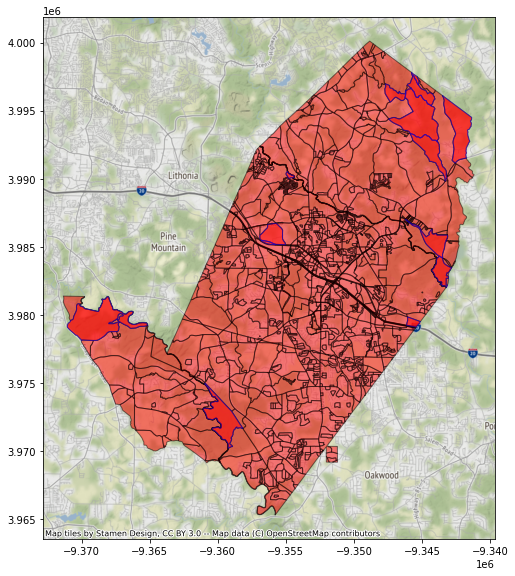

In [ ]:
#printing out the map with the unserved areas outlined in blue
visualize(gdfs,edgecolors=['k','b'],units=910.)